In [2]:
import matplotlib.pyplot as plt
import numpy as np
from qiskit import IBMQ, Aer, assemble, transpile, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import *
from qiskit.tools.jupyter import *
from ibm_quantum_widgets import *
from qiskit.tools.monitor import job_monitor

In [3]:
#Se define el circuito cuantico para la ejecucion del algoritmo de Grover (2 qubits)
num_qubits = 2
grover_circuit = QuantumCircuit(num_qubits, num_qubits)

ibmqfactory.load_account:WARNING:2022-10-04 16:59:43,907: Credentials are already in use. The existing account in the session will be replaced.


In [4]:
#Preparacion de los estados iniciales (se pasa cada qubit por 1 Hadamard)
def initialize_circ(qc, qubits):
  for q in qubits:
    qc.h(q)
  return qc

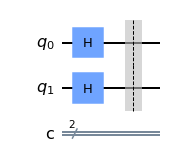

In [5]:
grover_circuit = initialize_circ(grover_circuit, [0,1])
grover_circuit.barrier()
grover_circuit.draw()

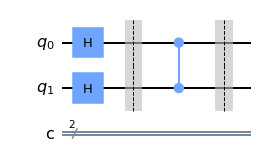

In [6]:
#Se define el Oracle (en este caso una compuerta CZ)
grover_circuit.cz(0, 1)
grover_circuit.barrier()
grover_circuit.draw()

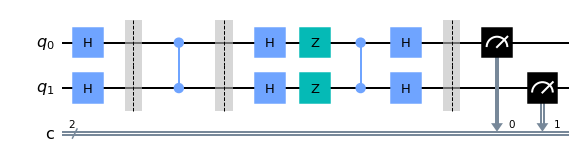

In [7]:
#Se define el operador de Grover (Se destaca que para este caso es mas compacto que para los otros 3 posibles casos)
grover_circuit.h([0, 1])
grover_circuit.z([0, 1])
grover_circuit.cz(0, 1)
grover_circuit.h([0, 1])
grover_circuit.barrier()
grover_circuit.measure([0,1], [0, 1])
grover_circuit.draw()

In [9]:
#Se ejecuta su simulacion obteniendo el resultado deseado
backend = Aer.get_backend('qasm_simulator')
job = execute(grover_circuit, backend, shots = 1)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 1}


In [8]:
from qiskit.providers.ibmq import least_busy
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q-education', group='uni-antioquia-1', project='qcudea2022-1')
Remote_QProcessor = least_busy(provider.backends(filters=lambda qprocessor: qprocessor.configuration().n_qubits >= 5 
                                       and not qprocessor.configuration().simulator 
                                       and qprocessor.status().operational==True))
print("El computador cuántico menos ocupado es el " + Remote_QProcessor.name())

ibmqfactory.load_account:WARNING:2022-10-04 17:01:45,273: Credentials are already in use. The existing account in the session will be replaced.


El computador cuántico menos ocupado es el ibm_perth


In [11]:
#Se ejecuta en un computador cuantico
transpiled_grover_circuit = transpile(grover_circuit, Remote_QProcessor, optimization_level=3)
job = Remote_QProcessor.run(transpiled_grover_circuit)
job_monitor(job, interval=2)

Job Status: job has successfully run


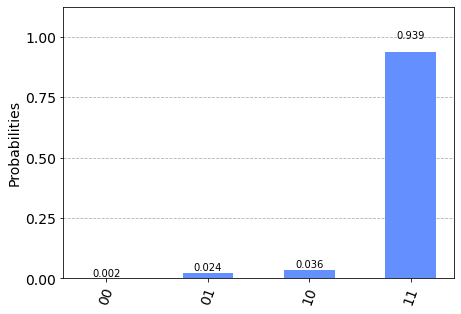

In [12]:
results = job.result()
answer = results.get_counts(grover_circuit)
plot_histogram(answer)